In [174]:
import pandas as pd

In [175]:
import matplotlib.pyplot as plt

In [176]:
import seaborn as sns

In [177]:
%matplotlib inline

In [178]:
import plotly.express as px

In [179]:
import plotly.graph_objects as go

In [180]:
import folium

In [181]:
df = pd.read_excel(r"C:\Users\LENOVO\Downloads\Covid cases in India.xlsx")
df.head()

,S. No.,Name of State / UT,Total Confirmed cases (Indian National),Total Confirmed cases ( Foreign National ),Cured,Death
0,1,Andhra Pradesh,12,0,1,0
1,2,Chhattisgarh,6,0,0,0
2,3,Delhi,38,1,6,1
3,4,Gujarat,43,0,0,3
4,5,Haryana,16,14,11,0


In [182]:
df.drop(["S. No."],axis=1,inplace=True)

In [183]:
df.head()

,Name of State / UT,Total Confirmed cases (Indian National),Total Confirmed cases ( Foreign National ),Cured,Death
0,Andhra Pradesh,12,0,1,0
1,Chhattisgarh,6,0,0,0
2,Delhi,38,1,6,1
3,Gujarat,43,0,0,3
4,Haryana,16,14,11,0


In [184]:
df['Total_cases']= df['Total Confirmed cases (Indian National)']+df['Total Confirmed cases ( Foreign National )']

In [185]:
total_cases = df['Total_cases'].sum()
print("The total number of cases",total_cases)

The total number of cases 729


In [186]:
df.head()

,Name of State / UT,Total Confirmed cases (Indian National),Total Confirmed cases ( Foreign National ),Cured,Death,Total_cases
0,Andhra Pradesh,12,0,1,0,12
1,Chhattisgarh,6,0,0,0,6
2,Delhi,38,1,6,1,39
3,Gujarat,43,0,0,3,43
4,Haryana,16,14,11,0,30


In [187]:
India_cord = pd.read_excel(r"C:\Users\LENOVO\Downloads\Indian Coordinates.xlsx")
Indiacases= pd.read_excel(r"C:\Users\LENOVO\Downloads\per_day_cases.xlsx",sheet_name="India",parse_dates=True)
koreacases=pd.read_excel(r"C:\Users\LENOVO\Downloads\per_day_cases.xlsx",sheet_name="Korea",parse_dates=True)
italycases=pd.read_excel(r"C:\Users\LENOVO\Downloads\per_day_cases.xlsx",sheet_name="Italy",parse_dates=True)
wuhancases=pd.read_excel(r"C:\Users\LENOVO\Downloads\per_day_cases.xlsx",sheet_name="Wuhan",parse_dates=True)

In [188]:
df.style.background_gradient(cmap="Reds")

,Name of State / UT,Total Confirmed cases (Indian National),Total Confirmed cases ( Foreign National ),Cured,Death,Total_cases
0,Andhra Pradesh,12,0,1,0,12
1,Chhattisgarh,6,0,0,0,6
2,Delhi,38,1,6,1,39
3,Gujarat,43,0,0,3,43
4,Haryana,16,14,11,0,30
5,Himachal Pradesh,4,0,0,1,4
6,Karnataka,20,0,3,2,20
7,Kerala,131,7,11,0,138
8,Madhya Pradesh,23,0,0,1,23
9,Maharashtra,144,3,15,4,147


In [189]:
df['Total_activecases'] = df['Total_cases']-(df['Death']+df['Cured'])
total_activecases = df['Total_activecases'].sum()
print("total number of active caases is",total_activecases)

total number of active caases is 648


In [190]:
df.head()

,Name of State / UT,Total Confirmed cases (Indian National),Total Confirmed cases ( Foreign National ),Cured,Death,Total_cases,Total_activecases
0,Andhra Pradesh,12,0,1,0,12,11
1,Chhattisgarh,6,0,0,0,6,6
2,Delhi,38,1,6,1,39,32
3,Gujarat,43,0,0,3,43,40
4,Haryana,16,14,11,0,30,19


In [191]:
Tot_cases = df.groupby('Name of State / UT')['Total_activecases'].sum().sort_values(ascending=False).to_frame()
Tot_cases

,Total_activecases
Name of State / UT,
Maharashtra,128
Kerala,127
Telengana,44
Rajasthan,40
Gujarat,40
Tamil Nadu,33
Uttar Pradesh,32
Delhi,32
Punjab,28


In [192]:
Tot_cases.style.background_gradient(cmap="viridis")

,Total_activecases
Name of State / UT,
Maharashtra,128
Kerala,127
Telengana,44
Rajasthan,40
Gujarat,40
Tamil Nadu,33
Uttar Pradesh,32
Delhi,32
Punjab,28


In [193]:
df_full = pd.merge(India_cord,df,on="Name of State / UT")

In [194]:
map= folium.Map(location=[20,70],zoom_start=4,tiles='stamenterrain')
for lat,lon, value, name in zip(df_full['Latitude'],df_full["Longitude"],df_full['Total_cases'],df_full['Name of State / UT']):
    folium.CircleMarker([lat,lon],radius=value*0.2,popup = ('<strong>State</strong: '+ str(name).capitalize()+'<br>''<strong>Total_cases</strong>: '+str(value) + '<br>'),color='orange',fill_color='orange',fill_opacity=0.3).add_to(map)


In [195]:
map

c:\users\lenovo\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



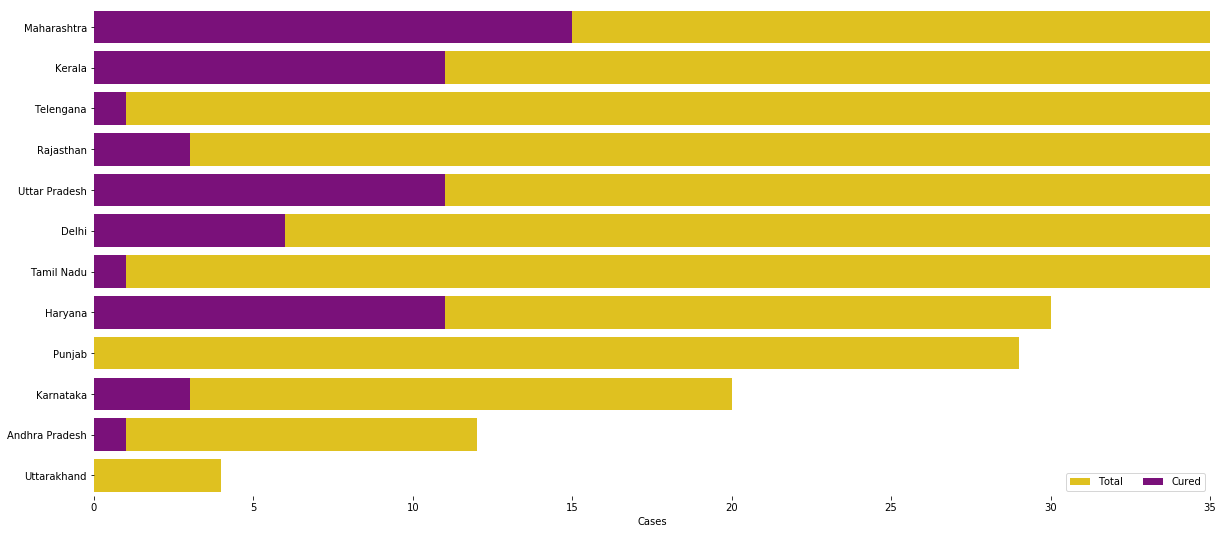

In [196]:
f,ax = plt.subplots(figsize = (20,9))
data = df_full[['Name of State / UT','Total_cases','Cured','Death']]
data.sort_values('Total_cases',ascending=False,inplace=True)
sns.set_color_codes("pastel")
sns.barplot(x="Total_cases", y="Name of State / UT", data=data,label="Total", color="gold")
sns.set_color_codes("muted")
sns.barplot(x="Cured",y="Name of State / UT",data=data,label="Cured",color="darkmagenta")
ax.legend(ncol=2,loc="lower right",frameon=True)
ax.set(xlim=(0,35),ylabel="",xlabel="Cases")
sns.despine(left=True,bottom=True)

In [197]:
import plotly

In [198]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=Indiacases['Date'], y = Indiacases['Total Cases'], mode='lines+markers',name='Total_cases'))
fig.update_layout(title_text='Trend of Coronavirus Cases in India (Cumulative cases)',plot_bgcolor='rgb(230, 230, 230)')
fig.write_html("fig.html",auto_open=True)


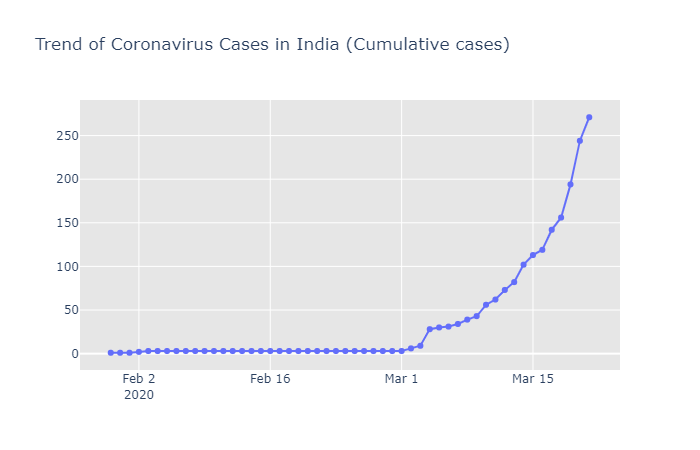

In [199]:
from IPython.display import Image
Image(filename="scatter1.png")

In [200]:
import plotly.express as px
fig = px.bar(Indiacases, x="Date", y="New Cases", barmode='group', height=400)
fig.update_layout(title_text='Coronavirus Cases in India on daily basis',plot_bgcolor='rgb(230, 230, 230)')
fig.write_html("fig.html",auto_open=True)


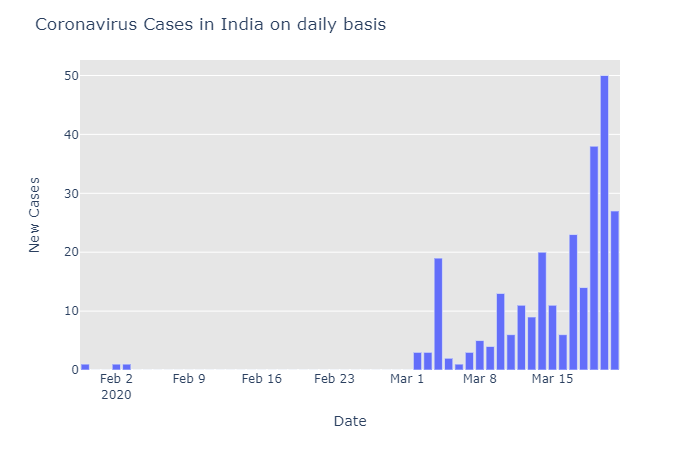

In [201]:
from IPython.display import Image
Image(filename="bar.png")

In [202]:
fig = px.bar(Indiacases,x="Date",y="Total Cases",color="Total Cases",orientation="v",
             height=600,title="COnfirmed cases in india",
             color_discrete_sequence=px.colors.cyclical.HSV)
'''https://plot.ly/python/builtin-colorscales/'''
fig.update_layout(plot_bgcolor='rgb(230,230,230)')
fig.write_html("fig.html",auto_open=True)

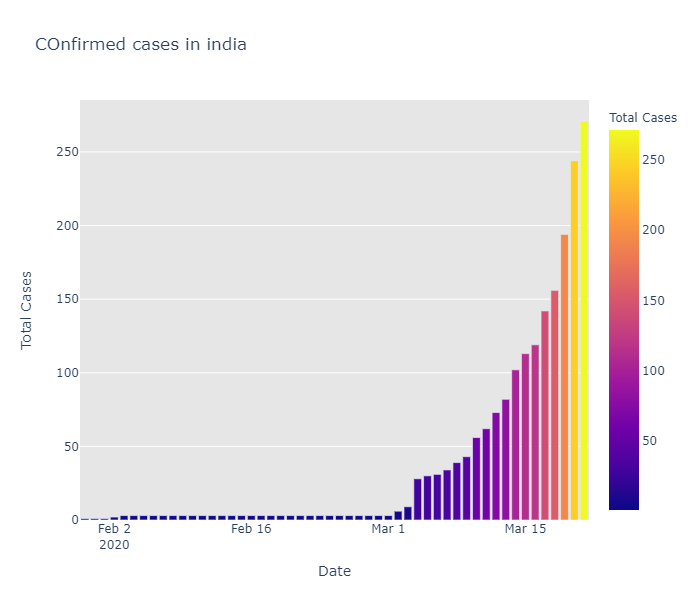

In [203]:
from IPython.display import Image
Image(filename="HSV.png")

In [204]:
fig = px.bar(italycases,x="Date",y="Total Cases",color="Total Cases",title="confirmed cases in italy",
             orientation="v",color_continuous_scale=px.colors.cyclical.mygbm_r)
fig.update_layout(plot_bgcolor="rgb(230,230,230)")
fig.write_html("fig.html",auto_open=True)

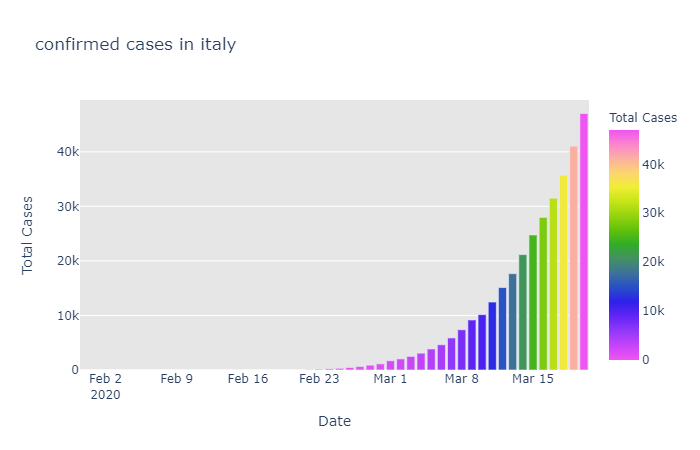

In [205]:
from IPython.display import Image
Image(filename="italy.png")

In [206]:
fig = px.bar(koreacases,x="Date",y="Total Cases",color="Total Cases",
            height=600,title="Confirmed cases in korea",
            color_discrete_sequence=px.colors.cyclical.mrybm)
fig.update_layout(plot_bgcolor="rgb(230,230,230)")
fig.write_html('fig.html',auto_open=True)

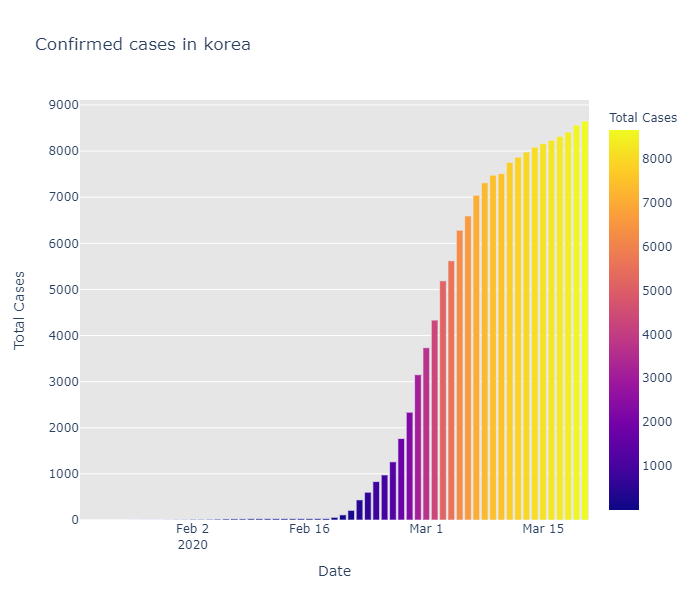

In [207]:
from IPython.display import Image
Image(filename="korea.png")

In [208]:
fig = px.bar(wuhancases,x="Date",y="Total Cases",color="Total Cases",height=500,
             orientation="v",
             color_discrete_sequence=px.colors.cyclical.mrybm_r)
fig.update_layout(plot_bgcolor="rgb(230,230,230)")
fig.write_html("fig.html",auto_open=True)

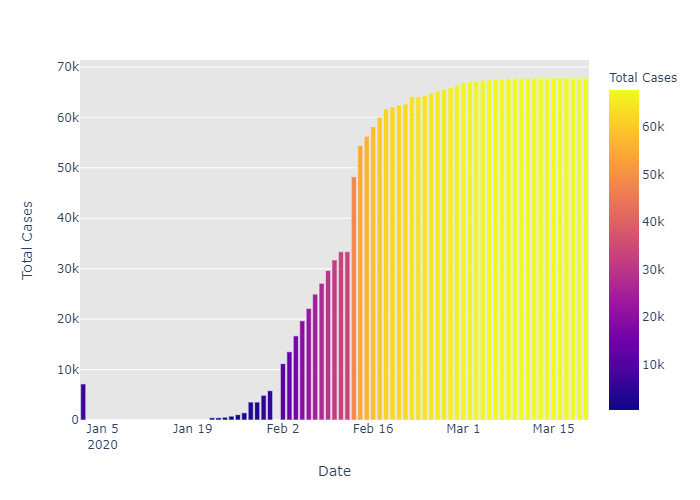

In [209]:
from IPython.display import Image
Image(filename="wuhan.png")

In [210]:
from plotly.subplots import make_subplots

In [211]:
fig = make_subplots(rows=2, cols=2,
                   specs=[[{}, {}],
                         [{"colspan":2}, None]],
                   subplot_titles=("S.Korea","India","Italy"))

fig.add_trace(go.Bar(x=koreacases['Date'],y=koreacases['Total Cases'],
                    marker = dict(color = koreacases['Total Cases'],coloraxis="coloraxis")),1,1)

fig.add_trace(go.Bar(x=italycases['Date'],y=italycases['Total Cases'],
                    marker = dict(color = italycases['Total Cases'],coloraxis="coloraxis")),1,2)

fig.add_trace(go.Bar(x=Indiacases['Date'],y=Indiacases['Total Cases'],
                    marker = dict(color = Indiacases['Total Cases'],coloraxis="coloraxis")),2,1)

fig.update_layout(coloraxis=dict(colorscale='Bluered_r'),
                  showlegend=False,
                  title_text="Total confirmed cases (cumilative)")

fig.update_layout(plot_bgcolor='rgb(230,230,230,230)')

fig.write_html("fig.html",auto_open=True)

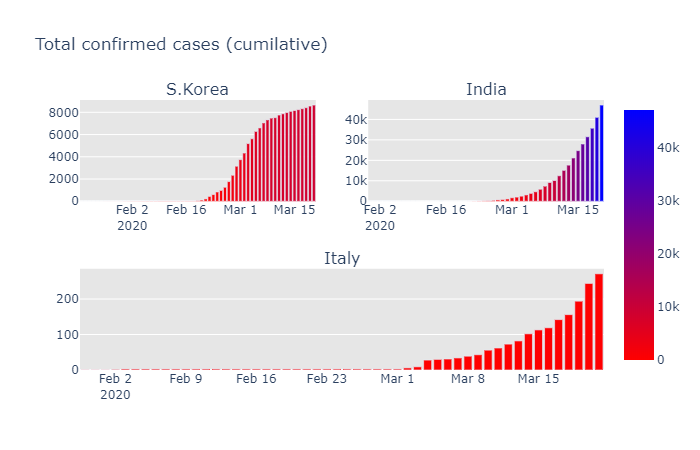

In [212]:
from IPython.display import Image
Image(filename="plot.png")

In [213]:
fig = make_subplots(rows=2, cols=2,
                   specs=[[{}, {}],
                         [{"colspan":2}, None]],
                   subplot_titles=("S.Korea","India","Italy"))

fig.add_trace(go.Scatter(x=koreacases['Date'],y=koreacases['Total Cases'],
                    marker = dict(color = koreacases['Total Cases'],coloraxis="coloraxis")),1,1)

fig.add_trace(go.Scatter(x=italycases['Date'],y=italycases['Total Cases'],
                    marker = dict(color = italycases['Total Cases'],coloraxis="coloraxis")),1,2)

fig.add_trace(go.Scatter(x=Indiacases['Date'],y=Indiacases['Total Cases'],
                    marker = dict(color = Indiacases['Total Cases'],coloraxis="coloraxis")),2,1)

fig.update_layout(coloraxis=dict(colorscale='Bluered_r'),
                  showlegend=False,
                  title_text="Total confirmed cases (cumilative)")

fig.update_layout(plot_bgcolor='rgb(230,230,230,230)')

fig.write_html("fig.html",auto_open=True)

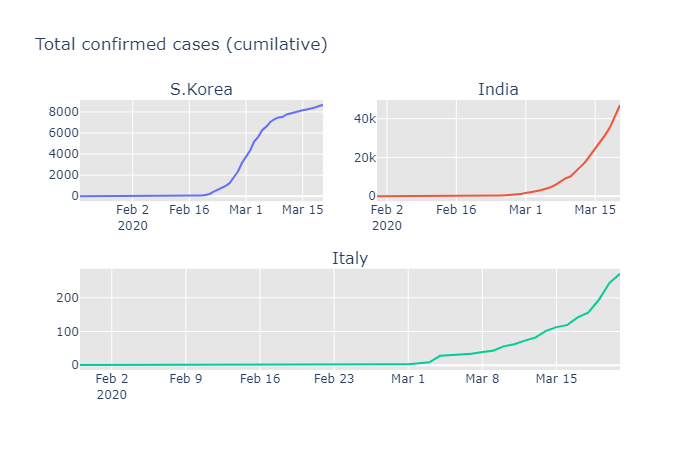

In [214]:
from IPython.display import Image
Image(filename="plots.png")

## **World Wide Coronavirus**

In [215]:
df=pd.read_csv('https://raw.githubusercontent.com/mona2401/COVID-19-Time-Series-Forecasting-with-Data-Analysis/master/covid_19_data.csv',parse_dates=['Last Update'])
df.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,2020-01-22 17:00:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,2020-01-22 17:00:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,2020-01-22 17:00:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,2020-01-22 17:00:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,2020-01-22 17:00:00,0.0,0.0,0.0


In [216]:
df.rename(columns={'ObservationDate':'Date','Country/Region':'Country'},inplace=True)
df.head(2)

,SNo,Date,Province/State,Country,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,2020-01-22 17:00:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,2020-01-22 17:00:00,14.0,0.0,0.0


In [217]:
df_confirmed = pd.read_csv("https://raw.githubusercontent.com/mona2401/COVID-19-Time-Series-Forecasting-with-Data-Analysis/master/time_series_covid_19_confirmed.csv")
df_deaths = pd.read_csv('https://raw.githubusercontent.com/mona2401/COVID-19-Time-Series-Forecasting-with-Data-Analysis/master/time_series_covid_19_deaths.csv')
df_recovered = pd.read_csv("https://raw.githubusercontent.com/mona2401/COVID-19-Time-Series-Forecasting-with-Data-Analysis/master/time_series_covid_19_recovered.csv")

In [218]:
df_confirmed.rename(columns={'Country/Region':'Country'},inplace=True)
df_deaths.rename(columns={'Country/Region':'Country'},inplace=True)
df_recovered.rename(columns={'Country/Region':'Country'},inplace=True)
df_confirmed.head(2)

,Province/State,Country,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20
0,NaN,Thailand,15.0,101.0,2,3,5,7,8,8,...,47,48,50,50,50,53,59,70,75,82
1,NaN,Japan,36.0,138.0,2,1,2,2,4,4,...,360,420,461,502,511,581,639,639,701,773


In [219]:
df.head(2)

,SNo,Date,Province/State,Country,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,2020-01-22 17:00:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,2020-01-22 17:00:00,14.0,0.0,0.0


In [220]:
df1 = df.groupby(['Date','Country','Province/State'])[['SNo','Date','Province/State',
                                                      'Country','Confirmed','Deaths',
                                                      'Recovered']].sum().reset_index()
df1.head()

,Date,Country,Province/State,SNo,Confirmed,Deaths,Recovered
0,01/22/2020,Hong Kong,Hong Kong,13,0.0,0.0,0.0
1,01/22/2020,Macau,Macau,21,1.0,0.0,0.0
2,01/22/2020,Mainland China,Anhui,1,1.0,0.0,0.0
3,01/22/2020,Mainland China,Beijing,2,14.0,0.0,0.0
4,01/22/2020,Mainland China,Chongqing,3,6.0,0.0,0.0


In [221]:
df.query('Country=="India"').groupby("Last Update")[['Confirmed',
                                                  'Deaths','Recovered']].sum().reset_index()

,Last Update,Confirmed,Deaths,Recovered
0,2020-01-30 16:00:00,1.0,0.0,0.0
1,2020-01-31 08:15:00,1.0,0.0,0.0
2,2020-01-31 23:59:00,1.0,0.0,0.0
3,2020-02-02 06:03:08,2.0,0.0,0.0
4,2020-02-03 21:43:02,30.0,0.0,0.0
5,2020-02-13 18:53:02,9.0,0.0,0.0
6,2020-02-16 07:43:02,45.0,0.0,45.0
7,2020-03-02 22:33:09,10.0,0.0,6.0
8,2020-03-04 12:33:03,28.0,0.0,3.0
9,2020-03-05 13:53:03,30.0,0.0,3.0


In [222]:
df.groupby('Date').sum().head()

,SNo,Confirmed,Deaths,Recovered
Date,,,,
01/22/2020,741,555.0,17.0,28.0
01/23/2020,2829,653.0,18.0,30.0
01/24/2020,4305,941.0,26.0,36.0
01/25/2020,6490,1438.0,42.0,39.0
01/26/2020,9071,2118.0,56.0,52.0


In [223]:
confirmed = df.groupby('Date').sum()['Confirmed'].reset_index()
deaths = df.groupby('Date').sum()['Deaths'].reset_index()
recovered = df.groupby('Date').sum()['Recovered'].reset_index()

In [224]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=confirmed['Date'],y=confirmed['Confirmed'],
                        mode = 'lines+markers',name='Confirmed',line=dict(color='blue',width=2)))
fig.add_trace(go.Scatter(x=deaths['Date'],y=deaths['Deaths'],
                        mode = 'lines+markers',name='Deaths',line=dict(color='blue',width=2)))
fig.add_trace(go.Scatter(x=recovered['Date'],y=recovered['Recovered'],
                        mode = 'lines+markers',name='Recovered',line=dict(color='blue',width=2)))
fig.update_layout(title='World Wide Cases', xaxis_tickfont_size=14,yaxis=dict(title='Number of cases'))
fig.write_html("fig.html",auto_open=True)

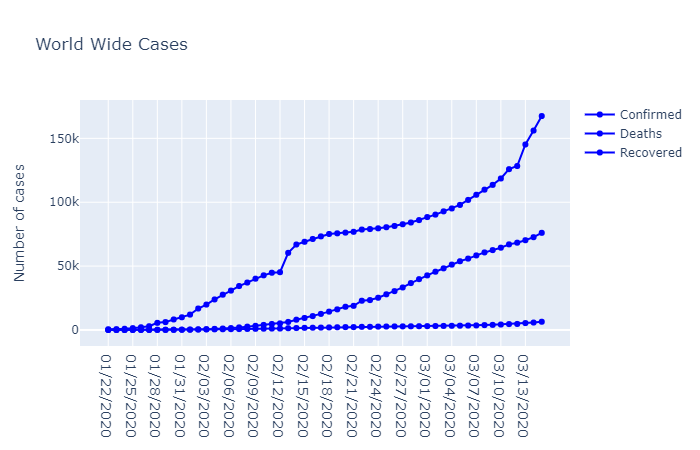

In [225]:
from IPython.display import Image
Image(filename="worldcases.png")

In [226]:
df_confirmed = df_confirmed[['Province/State',"Lat","Long","Country"]]
df_temp = df.copy()
df_temp['Country'].replace({'Mainland China':'China'},inplace=True)
df_latlong = pd.merge(df_temp,df_confirmed,on=['Country','Province/State'])

In [227]:
fig = px.density_mapbox(df_latlong,lat="Lat",lon="Long",hover_name="Province/State",
                       hover_data=["Confirmed","Deaths","Recovered"],animation_frame="Date",
                       color_continuous_scale="Portland",radius=7,zoom=0,height=700)
fig.update_layout(title="world wide cases Time Lapse - Confirmed, Deaths, Recovered'")
fig.update_layout(mapbox_style="open-street-map",mapbox_center_lon=0)
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.write_html("fig.html",auto_open=True)

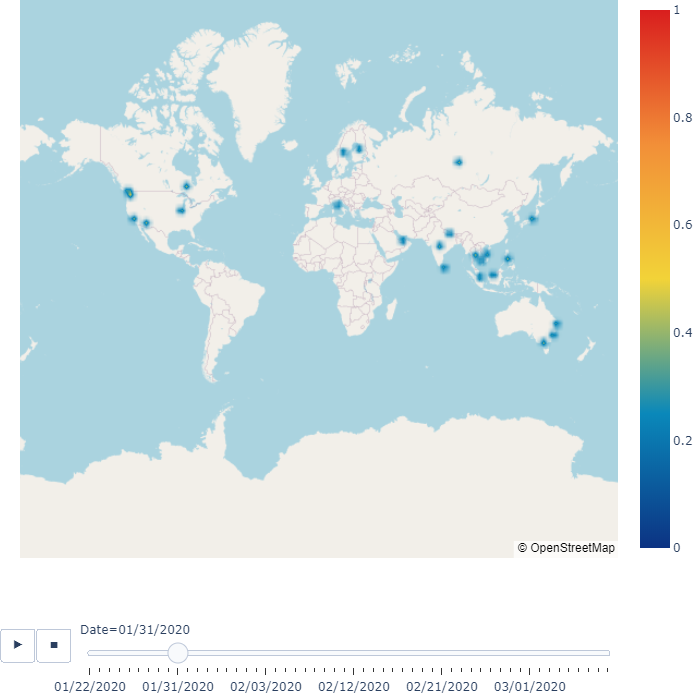

In [231]:
from IPython.display import Image
Image(filename="Growing corona.png")

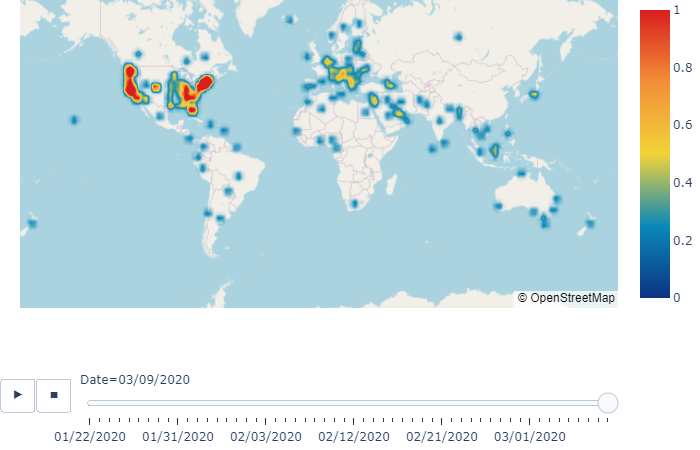

In [233]:
from IPython.display import Image
Image(filename="Grew.png")

## **Forecasting using fbprophet**

In [234]:
from fbprophet import fbprophet

ModuleNotFoundError: No module named 'fbprophet'